In [8]:
from sklearn.svm import SVC
import spacy
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
from matplotlib.pyplot import specgram

test_angry=[]
test_happy=[]
test_neutral=[]
test_sad=[]
train_angry=[]
train_happy=[]
train_neutral=[]
train_sad=[]
label_train=[]
label_test=[]

In [9]:
################## Feature_Extraction ##########################


################## Test_angry ################
for file in glob.glob('SERDataset/Test/Angry/*'):
    y,sr=sf.read(file)
    m=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=47).T,axis=0)
    melspect=np.mean(librosa.feature.melspectrogram(y=y,sr=sr).T,axis=0)
    t=np.mean(librosa.feature.tonnetz(y=y,sr=sr).T,axis=0)
    stack=np.hstack((m,t,melspect))
    test_angry.append(stack)
    label_test.append('Angry')

############### Train_angry #################    
for file in glob.glob('SERDataset/Train/Angry/*'):
    y,sr=sf.read(file)
    m=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=47).T,axis=0) 
    melspect=np.mean(librosa.feature.melspectrogram(y=y,sr=sr).T,axis=0)
    t=np.mean(librosa.feature.tonnetz(y=y,sr=sr).T,axis=0)
    stack=np.hstack((m,t,melspect))
    train_angry.append(stack)
    label_train.append('Angry')    
    
############# Test_happy ####################    
for file in glob.glob('SERDataset/Test/Happy/*'):
    y,sr=sf.read(file)
    m=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=47).T,axis=0)
    melspect=np.mean(librosa.feature.melspectrogram(y=y,sr=sr).T,axis=0)
    t=np.mean(librosa.feature.tonnetz(y=y,sr=sr).T,axis=0)
    stack=np.hstack((m,t,melspect))
    test_happy.append(stack)
    label_test.append('Happy')
    
############# Train_happy #######################    
for file in glob.glob('SERDataset/Train/Happy/*'):
    y,sr=sf.read(file)
    m=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=47).T,axis=0)
    melspect=np.mean(librosa.feature.melspectrogram(y=y,sr=sr).T,axis=0)
    t=np.mean(librosa.feature.tonnetz(y=y,sr=sr).T,axis=0)
    stack=np.hstack((m,t,melspect))
    train_happy.append(stack)
    label_train.append('Happy')
    
############# Test_neutral ####################
for file in glob.glob('SERDataset/Test/Neural/*'):
    y,sr=sf.read(file)
    m=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=47).T,axis=0)
    melspect=np.mean(librosa.feature.melspectrogram(y=y,sr=sr).T,axis=0)
    t=np.mean(librosa.feature.tonnetz(y=y,sr=sr).T,axis=0)
    stack=np.hstack((m,t,melspect))
    test_neutral.append(stack)
    label_test.append('Neutral') 
    
############# Train_neutral #################  
for file in glob.glob('SERDataset/Train/Neutral/*'):
    y,sr=sf.read(file)
    m=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=47).T,axis=0)
    melspect=np.mean(librosa.feature.melspectrogram(y=y,sr=sr).T,axis=0)
    t=np.mean(librosa.feature.tonnetz(y=y,sr=sr).T,axis=0)
    stack=np.hstack((m,t,melspect))
    train_neutral.append(stack)
    label_train.append('Neutral')
    
########### Test_sad ######################    
for file in glob.glob('SERDataset/Test/Sad/*'):
    y,sr=sf.read(file)
    m=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=47).T,axis=0)   
    melspect=np.mean(librosa.feature.melspectrogram(y=y,sr=sr).T,axis=0)
    t=np.mean(librosa.feature.tonnetz(y=y,sr=sr).T,axis=0)
    stack=np.hstack((m,t,melspect))
    test_sad.append(stack)    
    label_test.append('Sad')    
    
########## Train_sad #################
for file in glob.glob('SERDataset/Train/Sad/*'):
    y,sr=sf.read(file)
    m=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=47).T,axis=0)
    melspect=np.mean(librosa.feature.melspectrogram(y=y,sr=sr).T,axis=0)
    t=np.mean(librosa.feature.tonnetz(y=y,sr=sr).T,axis=0)
    stack=np.hstack((m,t,melspect))
    train_sad.append(stack)
    label_train.append('Sad')    

c:\users\fahad\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=690
  warnings.warn(
c:\users\fahad\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=684
  warnings.warn(
c:\users\fahad\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=342
  warnings.warn(


In [10]:
print('mfcc')
print('melspectrogram')
print('tonnetz')

mfcc
melspectrogram
tonnetz


In [15]:
list_test=[]
list_train=[]

############## appending labels to test_list ############

for angry in test_angry:
    list_test.append(angry)
    
for happy in test_happy:
    list_test.append(happy)
    
for neutral in test_neutral:
    list_test.append(neutral)
    
for sad in test_sad:
    list_test.append(sad)
    
############# appending labels to train_list ############

for angry1 in train_angry:
    list_train.append(angry1)

for happy1 in train_happy:
    list_train.append(happy1)
        
for neutral1 in train_neutral:
    list_train.append(neutral1)    

for sad1 in train_sad:
    list_train.append(sad1)
    
############ Appending for plot and dividing into x and y coordinates of list of test ###########
left=[]
right=[]

for i in list_test:
    m=i.shape[0]
    m=m//2
    left.append(np.mean(i[:m]))        
    right.append(np.mean(i[m:])) 

########### Appending for plot and dividing into x and y coordinates of list of train #########

for i in list_train:
    m=i.shape[0]
    m=m//2
    left.append(np.mean(i[:m]))        
    right.append(np.mean(i[m:]))    
    
#################### Add_labels_func #################

labels=[]
labels=label_test+label_train

########### SVC Classifier and model.fit #############

model = SVC(kernel='linear', C=1E10)
model.fit(list_train,label_train)

SVC(C=10000000000.0, kernel='linear')

<AxesSubplot:xlabel='x axis', ylabel='y axis'>

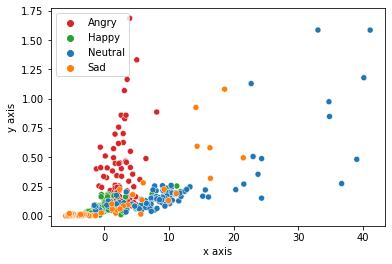

In [16]:
################# Plotting ########################

import pandas as pd
import seaborn as sns
df=pd.DataFrame(left,columns=['x axis'])
df['y axis']=right
sns.scatterplot(data=df,x='x axis',y='y axis', hue=labels, palette=['C3','C2','C0','C1'])

In [17]:
########## Checking Accuracy ##########

from sklearn.metrics import accuracy_score
YModel=model.predict(list_test)
accuracy_score(label_test,YModel)

1.0

In [18]:
########## Wav file ############ 

file='SERDataset/Test/Sad/SM25_F34_S084.wav'
y,sr=sf.read(file)
m=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=47).T,axis=0)
melspect=np.mean(librosa.feature.melspectrogram(y=y,sr=sr).T,axis=0)
t=np.mean(librosa.feature.tonnetz(y=y,sr=sr).T,axis=0)
stack=np.hstack((m,t,melspect))

res=model.predict(stack.reshape([1,-1]))
res[0]

'Sad'

In [1]:
!whoami

desktop-e9qhflv\fahad
